# Learn PPCA

In [134]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np

### Load the data 

In [135]:
data = io.loadmat('data/tonnage.mat')

In [136]:
X = data['X']
y = data['y'][:,0]
np.moveaxis(X,0,1).shape

(4, 1201, 582)

## Plot the data

In [137]:
vx = np.moveaxis(X,0,1).reshape(-1,582).T # Reshape the data
y[y==5]=2 # Relabel the label '5' to '2' 

data_normal = vx[y==0] # Select label 0 as normal sample
nNormalSample = vx[y==0].shape[0]
p = vx.shape[1] # Dimensionality of the data
nFailureMode = np.max(y)-1 # Falure Mode Number
nAbnormalSample = vx[y==1].shape[0] # sample number
data_abnormal = np.zeros((nFailureMode,nAbnormalSample,p)) # 5 failure modes, 69 samples, with 4804 dimension
for i in range(1,nFailureMode+1):
    data_abnormal[i-1] = vx[y==i]

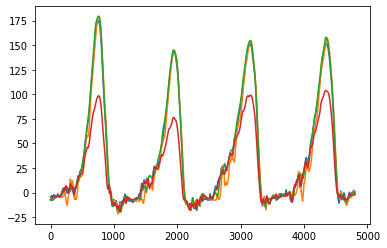

In [138]:
plt.plot(data_normal[0]) # Normal sample
for i in range(nFailureMode):
    plt.plot(data_abnormal[i][0]) # Abnormal Sample

## Run PCA  for IC (Normal, Leave for Further analysis when low-rank case is considered)
This will only be used in the low-rank case

In [139]:
from sklearn.decomposition import PCA
model_normal = PCA(svd_solver='auto', n_components=15)
model_normal.fit(data_normal)
W = model_normal.components_.T
sigma = np.sqrt(model_normal.noise_variance_)
print(np.sum(model_normal.explained_variance_ratio_))

0.8628242893477156


## IID Case for IC (Normal)

In [140]:
data_normal_mean = np.mean(data_normal,0)[np.newaxis,]
data_normal_demean = data_normal - data_normal_mean  # De-mean data
data_normal_std = np.std(data_normal,axis=0) # Standard Deviation
# We may need to consider a case where the distribution is a diagnoal matrix not Identity 
# The IC distribution is N(data_normal_mean, data_normal_std)


## IID Case for OC (Abnormal)

In [141]:
data_abnormal_mean = [[] for i in range(nFailureMode)]
data_abnormal_std = [[] for i in range(nFailureMode)]
for i in range(nFailureMode):
    data_abnormal_mean[i] = np.mean(data_abnormal[i],axis=0)[np.newaxis,]
    data_abnormal_std[i] = np.std(data_abnormal[i],axis=0)


### Created Selected Sampling in index matrix
We will create three test dataset for testing. 
The four dataset are simulated from our fault data with 100 normal samples and 100 abnormal samples from 4 different faiulre modes. 


In [143]:
normal_index = np.random.choice(nNormalSample-1, size=100, replace=True)
abormal_index = np.random.choice(nAbnormalSample-1, size=100, replace=True)

all_Simulated_data = [[] for i in range(nFailureMode)]
for i in range(nFailureMode):
    all_Simulated_data[i] = np.concatenate((data_normal[normal_index,:],data_abnormal[ifailure][abormal_index,:]))
    